In [36]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

# Import data for the songs
songs = gl.SFrame.read_csv("https://static.turi.com/datasets/millionsong/song_data.csv")  

Finished parsing file https://static.turi.com/datasets/millionsong/song_data.csv

Parsing completed. Parsed 100 lines in 1.75528 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 419257

Finished parsing file https://static.turi.com/datasets/millionsong/song_data.csv

Parsing completed. Parsed 1000000 lines in 1.82054 secs.

In [47]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("https://static.turi.com/datasets/millionsong/10000.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Finished parsing file https://static.turi.com/datasets/millionsong/10000.txt

Parsing completed. Parsed 100 lines in 1.31116 secs.

Read 844838 lines. Lines per second: 628861

Finished parsing file https://static.turi.com/datasets/millionsong/10000.txt

Parsing completed. Parsed 2000000 lines in 2.01489 secs.

In [44]:
# Review the header of the song data
songs.head()

song_id,title,release,artist_name,year
SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze PresentsWinter Sessions ...,Der Mystic,0
SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor""Sinfonie ...",Berwald: Symphonies Nos.1/2/3/4 ...,David Montgomery,0
SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
SOJCFMH12A8C13B0C2,Mama_ mama can't you see? ...,March to cadence with theUS marines ...,The Sun Harbor's Chorus-Documentary Recordings ...,0


In [48]:
#Review data for the usage.   
usage_data

X1,X2,X3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [49]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song', 'X3': 'plays'})

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


### Want to add code to change the song to the name from the song data & perhaps change user information to something less complex (new user ID)

In [50]:
#recommendation model

model = gl.recommender.create(usage_data, user_id = "user", item_id="song", target = "plays")
results = model.recommend(users=None, k=5)
model.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 2000000 observations with 76353 users and 10000 items.

Data prepared in: 2.79656s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 250000 / 2000000 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 48.6651                                  |

| 6       | 0.012207          | 63.3479                                  |

| 7       | 0.00610352        | 68.9432                                  |

| 8       | 0.00305176        | 72.0463                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 48.6651                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.005ms      | 84.8729           | 6.57972               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.88s        | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 3.78s        | 84.873            | 6.57972               |             |

| 1       | 5.43s        | 73.6295           | 6.78631               | 0.012207    |

| 2       | 7.56s        | 67.3811           | 6.49324               | 0.00725834  |

| 3       | 10.01s       | 58.5135           | 5.75241               | 0.00535512  |

| 4       | 11.79s       | 52.0141           | 5.28711               | 0.00431584  |

| 5       | 13.49s       | 47.1345           | 4.9031                | 0.00365075  |

| 6       | 15.95s       | 43.5976           | 4.61174               | 0.00318417  |

| 7       | 18.03s       | 41.2892           | 4.43146               | 0.00283652  |

| 8       | 19.78s       | 39.1711           | 4.26032               | 0.00256621  |

| 9       | 21.97s       | 37.6296           | 4.14058               | 0.00234924  |

| 10      | 23.83s       | 36.3284           | 4.0381                | 0.00217075  |

| 11      | 25.61s       | 35.135            | 3.94161               | 0.002021    |

| 12      | 28.18s       | 34.2464           | 3.87331               | 0.00189332  |

| 13      | 29.73s       | 33.3717           | 3.8039                | 0.001783    |

| 14      | 31.82s       | 32.706            | 3.75703               | 0.00168661  |

| 15      | 33.61s       | 32.1285           | 3.71112               | 0.00160155  |

| 16      | 35.25s       | 31.5344           | 3.66669               | 0.00152588  |

| 17      | 37.53s       | 30.827            | 3.60141               | 0.00145805  |

| 18      | 39.20s       | 30.3303           | 3.55894               | 0.00139687  |

| 19      | 40.95s       | 30.0315           | 3.54463               | 0.00134136  |

| 20      | 42.71s       | 29.5624           | 3.50164               | 0.00129074  |

| 21      | 44.45s       | 29.3315           | 3.49354               | 0.00124436  |

| 22      | 46.24s       | 28.8391           | 3.44345               | 0.00120169  |

| 23      | 48.22s       | 28.4038           | 3.39921               | 0.00116229  |

| 24      | 50.18s       | 28.2099           | 3.38972               | 0.00112578  |

| 25      | 52.31s       | 27.859            | 3.35815               | 0.00109183  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 26.4086

Final training RMSE: 3.12512

recommendations finished on 1000/76353 queries. users per second: 10920.8

recommendations finished on 2000/76353 queries. users per second: 10301.7

recommendations finished on 3000/76353 queries. users per second: 10162.1

recommendations finished on 4000/76353 queries. users per second: 9136.34

recommendations finished on 5000/76353 queries. users per second: 8007.08

recommendations finished on 6000/76353 queries. users per second: 7771.51

recommendations finished on 7000/76353 queries. users per second: 7324.62

recommendations finished on 8000/76353 queries. users per second: 7548.92

recommendations finished on 9000/76353 queries. users per second: 7749.76

recommendations finished on 10000/76353 queries. users per second: 7908.89

recommendations finished on 11000/76353 queries. users per second: 8055.8

recommendations finished on 12000/76353 queries. users per second: 8185.3

recommendations finished on 13000/76353 queries. users per second: 8290.21

recommendations finished on 14000/76353 queries. users per second: 8359.75

recommendations finished on 15000/76353 queries. users per second: 8425.7

recommendations finished on 16000/76353 queries. users per second: 8320.9

recommendations finished on 17000/76353 queries. users per second: 8039.71

recommendations finished on 18000/76353 queries. users per second: 7923.88

recommendations finished on 19000/76353 queries. users per second: 7842.42

recommendations finished on 20000/76353 queries. users per second: 7775.06

recommendations finished on 21000/76353 queries. users per second: 7674.18

recommendations finished on 22000/76353 queries. users per second: 7742.34

recommendations finished on 23000/76353 queries. users per second: 7784.47

recommendations finished on 24000/76353 queries. users per second: 7762.73

recommendations finished on 25000/76353 queries. users per second: 7795.98

recommendations finished on 26000/76353 queries. users per second: 7850.59

recommendations finished on 27000/76353 queries. users per second: 7894.9

recommendations finished on 28000/76353 queries. users per second: 7916.29

recommendations finished on 29000/76353 queries. users per second: 7942.82

recommendations finished on 30000/76353 queries. users per second: 7960.35

recommendations finished on 31000/76353 queries. users per second: 7984.01

recommendations finished on 32000/76353 queries. users per second: 8022.39

recommendations finished on 33000/76353 queries. users per second: 8059.77

recommendations finished on 34000/76353 queries. users per second: 8100.09

recommendations finished on 35000/76353 queries. users per second: 8135.64

recommendations finished on 36000/76353 queries. users per second: 8163.94

recommendations finished on 37000/76353 queries. users per second: 8154.76

recommendations finished on 38000/76353 queries. users per second: 8178.55

recommendations finished on 39000/76353 queries. users per second: 8196.93

recommendations finished on 40000/76353 queries. users per second: 8206.87

recommendations finished on 41000/76353 queries. users per second: 8223.78

recommendations finished on 42000/76353 queries. users per second: 8223

recommendations finished on 43000/76353 queries. users per second: 8204.98

recommendations finished on 44000/76353 queries. users per second: 8184.04

recommendations finished on 45000/76353 queries. users per second: 8178.98

recommendations finished on 46000/76353 queries. users per second: 8170.52

recommendations finished on 47000/76353 queries. users per second: 8174.5

recommendations finished on 48000/76353 queries. users per second: 8176.93

recommendations finished on 49000/76353 queries. users per second: 8167.67

recommendations finished on 50000/76353 queries. users per second: 8168.13

recommendations finished on 51000/76353 queries. users per second: 8173.17

recommendations finished on 52000/76353 queries. users per second: 8169.01

recommendations finished on 53000/76353 queries. users per second: 8121.19

recommendations finished on 54000/76353 queries. users per second: 8047.97

recommendations finished on 55000/76353 queries. users per second: 8054.65

recommendations finished on 56000/76353 queries. users per second: 7977.79

recommendations finished on 57000/76353 queries. users per second: 7917.09

recommendations finished on 58000/76353 queries. users per second: 7935.76

recommendations finished on 59000/76353 queries. users per second: 7958.17

recommendations finished on 60000/76353 queries. users per second: 7975.18

recommendations finished on 61000/76353 queries. users per second: 7961.43

recommendations finished on 62000/76353 queries. users per second: 7898.21

recommendations finished on 63000/76353 queries. users per second: 7817.8

recommendations finished on 64000/76353 queries. users per second: 7753.19

recommendations finished on 65000/76353 queries. users per second: 7719.45

recommendations finished on 66000/76353 queries. users per second: 7739.78

recommendations finished on 67000/76353 queries. users per second: 7761.87

recommendations finished on 68000/76353 queries. users per second: 7782.98

recommendations finished on 69000/76353 queries. users per second: 7799.17

recommendations finished on 70000/76353 queries. users per second: 7818.9

recommendations finished on 71000/76353 queries. users per second: 7838.6

recommendations finished on 72000/76353 queries. users per second: 7859.56

recommendations finished on 73000/76353 queries. users per second: 7876.66

recommendations finished on 74000/76353 queries. users per second: 7874.45

recommendations finished on 75000/76353 queries. users per second: 7865.69

recommendations finished on 76000/76353 queries. users per second: 7856.78

In [51]:
results # the recommendation output

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOOGNOZ12AAF3B2936,9.02233214862,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOPUCYA12A8C13A694,6.18963952548,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOOSIWM12A670202B9,6.02553315646,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFJIZM12A58A7F878,5.7557110358,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXHIDK12A58A7CFB3,5.21914668567,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,1.97190448082,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOAXGDH12A8C13F8A1,1.68198891915,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOPQLBY12A6310E992,1.31899043358,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOPPROJ12AB0184E18,0.826300108799,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSGBJB12A6D4FCDEC,0.739749396214,5


In [52]:
results[300:310]

user,song,score,rank
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOLGIWB12A58A77A05,4.98875381238,1
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOLRGVL12A8C143BC3,4.04876353032,2
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOHWXEU12A8C1320D1,3.30103160627,3
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOSXLTC12AF72A7F54,3.23193384893,4
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOLMKTS12A8AE46C27,3.03953983075,5
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOGLWGG12A6D4F8046,4.32678623683,1
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOMAKEB12A8C1322D2,3.93642158992,2
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOYQLYQ12A6D4F72EA,3.85790939815,3
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOSNOSA12A67ADA05B,3.79561062343,4
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SORKDWS12A6701E6D9,3.72341843135,5


Above shows the top 5 ratings for each user

In [54]:
usage_data.head()

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [55]:
results

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOOGNOZ12AAF3B2936,9.02233214862,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOPUCYA12A8C13A694,6.18963952548,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOOSIWM12A670202B9,6.02553315646,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFJIZM12A58A7F878,5.7557110358,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXHIDK12A58A7CFB3,5.21914668567,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,1.97190448082,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOAXGDH12A8C13F8A1,1.68198891915,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOPQLBY12A6310E992,1.31899043358,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOPPROJ12AB0184E18,0.826300108799,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSGBJB12A6D4FCDEC,0.739749396214,5


In [56]:
item_item = gl.recommender.item_similarity_recommender.create(usage_data,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head

Recsys training: model = item_similarity

Preparing data set.

Data has 2000000 observations with 76353 users and 10000 items.

Data prepared in: 2.85422s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.499ms                        | 1.25       |

| 75.552ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 454.322ms                           | 0                | 0               |

| 1.46s                               | 48.5             | 4863            |

| 2.47s                               | 99.5             | 9962            |

| 3.26s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 3.45646s

<bound method SFrame.head of Columns:
	song	str
	similar	str
	score	float
	rank	int

Rows: 29995

Data:
+--------------------+--------------------+----------------+------+
|        song        |      similar       |     score      | rank |
+--------------------+--------------------+----------------+------+
| SOAKIMP12A8C130995 | SOYHEPA12A8C13097F | 0.768602848053 |  1   |
| SOAKIMP12A8C130995 | SOOQJRN12A6310EDC0 | 0.599323928356 |  2   |
| SOAKIMP12A8C130995 | SOIJHHU12AF7299A88 | 0.581352412701 |  3   |
| SOBBMDR12A8C13253B | SORUKVE12A8C13D623 | 0.168111920357 |  1   |
| SOBBMDR12A8C13253B | SOJGZFQ12AF72A41B2 | 0.165343284607 |  2   |
| SOBBMDR12A8C13253B | SOSNSUE12A6D4F58F8 | 0.163988471031 |  3   |
| SOBXHDL12A81C204C0 | SOMLMKI12A81C204BC | 0.191700100899 |  1   |
| SOBXHDL12A81C204C0 | SODCRAR12A8C140C43 | 0.182167172432 |  2   |
| SOBXHDL12A81C204C0 | SOGKGLB12A81C22AFA | 0.178512811661 |  3   |
| SOBYHAJ12A6701BF1D | SOMYECL12A6701D9C8 | 0.707705914974 |  1   |
+-----------

In [57]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
train, test = gl.recommender.util.random_split_by_user(usage_data,
                                                      user_id="user", item_id="song",
                                                      max_num_users=100, item_test_proportion=0.2)

In [58]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 3.13855s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.002ms                        | 1.25       |

| 97.07ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 392.62ms                            | 0                | 0               |

| 1.40s                               | 55.25            | 5546            |

| 2.41s                               | 98               | 9804            |

| 3.15s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 3.32314s


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.128007804914493)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 9286c56721b756b946831dd2dc.

In [59]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [60]:
rmse_results['rmse_overall']

8.128007804914493

In [61]:
rmse_results['rmse_by_user']

user,count,rmse
9475a8272f2566f84e8928739a36d13c463ece12 ...,2,0.839041959977
6fea83e337a5ce61fbde00fdf71ac3232aa54b05 ...,4,11.5625589986
14ada7e24d05e8e439c05aff145b37f0e19d7bf5 ...,1,5.0
07fd076c16e88a88ed5ea5e8d1882b0c4a77acb3 ...,1,1.0
1e81370ee28282725582ef8a12287ba355e799c9 ...,25,1.72748657419
58420f54d762870bad926d4ea11f731323e9e7d1 ...,8,18.6132321479
95cea8dc27b8108b187c48b76abdf2fd7a90d68a ...,5,2.40518513196
f357a9506cf2052f4d6f5a47e219c9836ffdc17c ...,2,1.9429830462
d925b401337e353f4d4d9828fd2bd4aea2864c97 ...,2,3.60555127546
e45e416bd518a8f30159ec98062d955788ffb42e ...,4,8.7408612871


In [62]:
rmse_results['rmse_by_item']

song,count,rmse
SOBSLVH12A8C131F38,1,2.98708958758
SOYWRLV12AB0186090,1,1.0
SOQIPYO12AAF3B5B1D,1,1.0
SOJSGZT12A58A7E75C,1,1.0
SOZVCRW12A67ADA0B7,1,0.990422073872
SOFJIZM12A58A7F878,1,2.0
SOIQXJH12A8AE46CF6,1,2.90821557575
SOMPVIE12A8C135480,1,0.987287040027
SONOZCX12AB017F75E,1,0.989135065169
SONTEMF12A6D4F8D0B,1,1.0


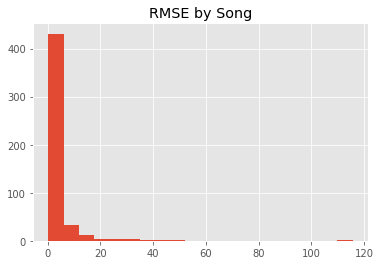

In [65]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

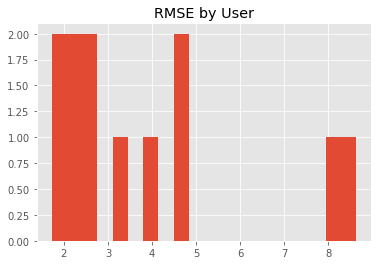

In [67]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [68]:
rmse_results['rmse_by_user']

user,count,rmse
9475a8272f2566f84e8928739a36d13c463ece12 ...,2,0.839041959977
6fea83e337a5ce61fbde00fdf71ac3232aa54b05 ...,4,11.5625589986
14ada7e24d05e8e439c05aff145b37f0e19d7bf5 ...,1,5.0
07fd076c16e88a88ed5ea5e8d1882b0c4a77acb3 ...,1,1.0
1e81370ee28282725582ef8a12287ba355e799c9 ...,25,1.72748657419
58420f54d762870bad926d4ea11f731323e9e7d1 ...,8,18.6132321479
95cea8dc27b8108b187c48b76abdf2fd7a90d68a ...,5,2.40518513196
f357a9506cf2052f4d6f5a47e219c9836ffdc17c ...,2,1.9429830462
d925b401337e353f4d4d9828fd2bd4aea2864c97 ...,2,3.60555127546
e45e416bd518a8f30159ec98062d955788ffb42e ...,4,8.7408612871


In [69]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

user,cutoff,precision,recall,count
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,1,1.0,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,2,0.5,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,3,0.333333333333,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,4,0.25,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,5,0.2,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,6,0.166666666667,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,7,0.142857142857,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,8,0.25,0.285714285714,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,9,0.222222222222,0.285714285714,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,10,0.2,0.285714285714,7


In [70]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.0490196078431,0.0600542992655,0.322456813848,0.302750592492
2,0.152941176471,0.26594481307,0.0781308533514,0.200844825426
46,0.0434782608696,0.0553990406816,0.352035468836,0.314237296598
31,0.0531309297913,0.0629226131468,0.312232412977,0.303591685825
26,0.0606334841629,0.0708892525885,0.307373603503,0.304668213784
8,0.110294117647,0.141436647512,0.1833796046,0.253198449257
5,0.110588235294,0.172199289069,0.117845955787,0.221194354614
16,0.0757352941176,0.094467410759,0.255901935755,0.295647837187
41,0.0461979913917,0.0567424142063,0.340125536176,0.305139121266
4,0.120588235294,0.186341577194,0.108934891361,0.217622399224


## Cross Validated Collaborative Filtering

In [71]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays")

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 2.98353s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 249936 / 1999493 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 49.1202                                  |

| 6       | 0.012207          | 63.0032                                  |

| 7       | 0.00610352        | 68.1563                                  |

| 8       | 0.00305176        | 71.6624                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 49.1202                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 84.8663           | 6.57946               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.93s        | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 3.90s        | 84.8663           | 6.57946               |             |

| 1       | 5.61s        | 73.6082           | 6.78191               | 0.012207    |

| 2       | 7.23s        | 67.4224           | 6.49849               | 0.00725834  |

| 3       | 8.99s        | 58.5953           | 5.77727               | 0.00535512  |

| 4       | 10.58s       | 51.6484           | 5.26045               | 0.00431584  |

| 5       | 12.23s       | 46.8585           | 4.87717               | 0.00365075  |

| 6       | 13.79s       | 43.4885           | 4.60848               | 0.00318417  |

| 7       | 15.77s       | 40.7413           | 4.383                 | 0.00283652  |

| 8       | 17.81s       | 39.0016           | 4.2472                | 0.00256621  |

| 9       | 19.51s       | 37.3006           | 4.10942               | 0.00234924  |

| 10      | 21.41s       | 36.0794           | 4.01408               | 0.00217075  |

| 11      | 23.13s       | 34.9724           | 3.91834               | 0.002021    |

| 12      | 24.78s       | 33.8872           | 3.83098               | 0.00189332  |

| 13      | 26.46s       | 33.0527           | 3.76868               | 0.001783    |

| 14      | 28.21s       | 32.7885           | 3.76694               | 0.00168661  |

| 15      | 29.97s       | 31.9306           | 3.69013               | 0.00160155  |

| 16      | 31.96s       | 31.3261           | 3.64041               | 0.00152588  |

| 17      | 33.82s       | 30.7297           | 3.5887                | 0.00145805  |

| 18      | 35.69s       | 30.3098           | 3.56552               | 0.00139687  |

| 19      | 37.78s       | 29.7315           | 3.50889               | 0.00134136  |

| 20      | 39.89s       | 29.3993           | 3.48307               | 0.00129074  |

| 21      | 41.79s       | 29.0723           | 3.46448               | 0.00124436  |

| 22      | 43.53s       | 28.7341           | 3.43605               | 0.00120169  |

| 23      | 45.70s       | 28.4988           | 3.41862               | 0.00116229  |

| 24      | 47.80s       | 28.2255           | 3.4069                | 0.00112578  |

| 25      | 49.60s       | 27.9927           | 3.38732               | 0.00109183  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 26.4638

Final training RMSE: 3.13831


Precision and recall summary statistics by cutoff
+--------+------------------+-----------------+
| cutoff |  mean_precision  |   mean_recall   |
+--------+------------------+-----------------+
|   1    |       0.0        |       0.0       |
|   2    | 0.0176470588235  | 0.0105882352941 |
|   3    | 0.0156862745098  | 0.0120588235294 |
|   4    | 0.0117647058824  | 0.0120588235294 |
|   5    | 0.00941176470588 | 0.0120588235294 |
|   6    | 0.00980392156863 | 0.0128431372549 |
|   7    | 0.0117647058824  | 0.0163190730838 |
|   8    | 0.0102941176471  | 0.0163190730838 |
|   9    | 0.0130718954248  | 0.0200445632799 |
|   10   | 0.0141176470588  | 0.0276075884899 |
+--------+------------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 9.182571727034146)

Per User RMSE (best)
+-------------------------------+-------+-----------------+
|              user             | count |       rmse      |
+-------------------------------+-------+-----------------+
| 31077857ba

In [72]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

cutoff,Avg of precision,Stdv of precision,Avg of recall
36,0.0147058823529,0.0223802531611,0.12324436018
2,0.0176470588235,0.0922611008315,0.0105882352941
46,0.0135549872123,0.0205496771628,0.145952298194
31,0.0159392789374,0.0250474383302,0.104812987631
26,0.016742081448,0.0285677721587,0.0948205449059
8,0.0102941176471,0.034362710134,0.0163190730838
5,0.00941176470588,0.0423529411765,0.0120588235294
16,0.0169117647059,0.0323529411765,0.0613185430951
41,0.0146341463415,0.0218793659004,0.142422886429
4,0.0117647058824,0.0529411764706,0.0120588235294


In [73]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 2.66532s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 249936 / 1999493 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.003685          | Not Viable                               |

| 1       | 0.000921251       | 79.0209                                  |

| 2       | 0.000460625       | 79.4083                                  |

| 3       | 0.000230313       | 79.7123                                  |

| 4       | 0.000115156       | 79.919                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.000921251       | 79.0209                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 511us        | 84.8663           | 6.57946               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.93s        | DIVERGED          | DIVERGED              | 0.000921251 |

| RESET   | 3.64s        | 84.8647           | 6.57946               |             |

| 1       | 5.61s        | DIVERGED          | DIVERGED              | 0.000460625 |

| RESET   | 6.33s        | 84.8651           | 6.57946               |             |

| 1       | 8.42s        | DIVERGED          | DIVERGED              | 0.000230313 |

| RESET   | 9.21s        | 84.8656           | 6.57946               |             |

| 1       | 10.60s       | 84.3543           | 6.55973               | 0.000115156 |

| 2       | 12.06s       | 83.6999           | 6.54692               | 3.4869e-005 |

| 3       | 13.51s       | 83.5558           | 6.5445                | 2.0545e-005 |

| 4       | 15.40s       | 83.4869           | 6.54323               |             |

| 5       | 17.52s       | 83.4448           | 6.54242               |             |

| 6       | 18.91s       | 83.4175           | 6.54184               |             |

| 7       | 21.24s       | 83.3951           | 6.54139               |             |

| 8       | 23.40s       | 83.3803           | 6.54104               |             |

| 9       | 24.79s       | 83.3667           | 6.54072               |             |

| 10      | 26.15s       | 83.3571           | 6.54047               |             |

| 11      | 27.52s       | 83.3477           | 6.54026               | 4.7931e-006 |

| 12      | 29.17s       | 83.3419           | 6.54007               |             |

| 13      | 31.06s       | 83.3358           | 6.5399                |             |

| 14      | 33.01s       | 83.3297           | 6.53973               |             |

| 15      | 34.96s       | 83.3245           | 6.53961               |             |

| 16      | 37.74s       | 83.3222           | 6.53948               |             |

| 17      | 40.31s       | 83.3181           | 6.53937               |             |

| 18      | 42.73s       | 83.3153           | 6.53926               |             |

| 19      | 45.84s       | 83.3118           | 6.53917               |             |

| 20      | 48.20s       | 83.3094           | 6.53908               |             |

| 21      | 50.14s       | 83.3081           | 6.53899               |             |

| 22      | 52.72s       | 83.3057           | 6.53891               | 2.3333e-006 |

| 23      | 54.77s       | 83.303            | 6.53883               |             |

| 24      | 57.22s       | 83.3009           | 6.53877               |             |

| 25      | 59.34s       | 83.301            | 6.5387                |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 83.3062

Final training RMSE: 6.53873


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0470588235294 | 0.0254901960784 |
|   2    | 0.0411764705882 | 0.0300980392157 |
|   3    | 0.0274509803922 | 0.0300980392157 |
|   4    | 0.0235294117647 | 0.0324509803922 |
|   5    | 0.0188235294118 | 0.0324509803922 |
|   6    | 0.0156862745098 | 0.0324509803922 |
|   7    | 0.0134453781513 | 0.0324509803922 |
|   8    | 0.0132352941176 | 0.0353921568627 |
|   9    | 0.0117647058824 | 0.0353921568627 |
|   10   | 0.0117647058824 | 0.0471568627451 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.449705654634926)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 78f6fac69c1b56798cf33802c9.

In [74]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall
36,0.0078431372549,0.0157202790468,0.0900311942959
2,0.0411764705882,0.137450840536,0.0300980392157
46,0.00613810741688,0.0123028270801,0.0900311942959
31,0.00872865275142,0.0181052909934,0.0885606060606
26,0.00814479638009,0.0205172561968,0.0688636363636
8,0.0132352941176,0.0429754094006,0.0353921568627
5,0.0188235294118,0.06596633303,0.0324509803922
16,0.00882352941176,0.0237808259247,0.0648039215686
41,0.00688665710187,0.013803171846,0.0900311942959
4,0.0235294117647,0.0824579162875,0.0324509803922


## Is this better than the item item matrix

In [75]:
comparison = gl.recommender.util.compare_models(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.128007804914493)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
|

In [76]:
comparisonstruct = gl.compare(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0470588

In [77]:
gl.show_comparison(comparisonstruct,[item_item, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [79]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-05-2017-22-30-3600000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-05-2017-22-30-3600000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-05-2017-22-30-3600000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-05-2017-22-30-3600000-a4d95'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-05-2017-22-30-3600000-a4d95' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-05-2017-22-30-3600000-a4d95' scheduled.


In [95]:
job.get_status()

{'Canceled': 0, 'Completed': 5, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [96]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,song,0.001,50,8,8,0.25
0,song,0.001,50,16,4,0.5
3,song,0.001,25,16,4,0.1
2,song,0.001,50,24,4,0.5
4,song,0.001,25,12,4,0.1
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,plays,user,0.0691298197821,0.0171015460864,6.45134550772,0.0188235294118
0.001,plays,user,0.0700780595138,0.0173721463543,6.51443869357,0.0188235294118
0.001,plays,user,0.0567084031852,0.0139053665718,6.41214183683,0.0164705882353
0.001,plays,user,0.0678724853311,0.0168710091426,6.46883208304,0.0188235294118


In [97]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

{'item_id': 'song',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 12,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'plays',
 'user_id': 'user'}

In [98]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : user
 Item ID                          : song
 Target                           : plays
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 1999493
 Number of users                  : 76352
 Number of items                  : 10000
 
 Training summary
 ----------------
 Training time                    : 87.4671
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 16
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regu

In [99]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0588235294118 | 0.0278431372549 |
|   2    | 0.0470588235294 | 0.0324509803922 |
|   3    | 0.0313725490196 | 0.0324509803922 |
|   4    | 0.0235294117647 | 0.0324509803922 |
|   5    | 0.0188235294118 | 0.0324509803922 |
|   6    | 0.0156862745098 | 0.0324509803922 |
|   7    | 0.0134453781513 | 0.0324509803922 |
|   8    | 0.0117647058824 | 0.0324509803922 |
|   9    | 0.0104575163399 | 0.0324509803922 |
|   10   | 0.0105882352941 | 0.0353921568627 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0470588

In [100]:
models[1]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : user
Item ID                          : song
Target                           : plays
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1999493
Number of users                  : 76352
Number of items                  : 10000

Training summary
----------------
Training time                    : 84.4065

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 8
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 50

Regularization Settings
-----------------------
regularization                   : 0.001
regularization_type              : norma

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item